In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
# set_length = []
# set_feat_num = []

# for i in range(10):
#     df_check = pd.read_csv(f'data/Kickstarter00{i}.csv')
#     set_length.append(len(df_check))
#     set_feat_num.append(df_check.shape[1])


# for i in range(10, 56):
#     df_check = pd.read_csv(f'data/Kickstarter0{i}.csv')
#     set_length.append(len(df_check))
#     set_feat_num.append(df_check.shape[1])

# print(f"Observations in each dataset: {set_length}")
# print(f"Number of features in each dataset: {set_feat_num}")

Observations in each dataset: [3779, 3784, 3790, 3795, 3789, 3780, 3786, 3788, 3784, 3790, 3786, 3784, 3781, 3793, 3786, 3792, 3782, 3786, 3785, 3791, 3786, 3787, 3778, 3780, 3796, 3784, 3793, 3779, 3785, 3785, 3793, 3787, 3788, 3780, 3784, 3794, 3784, 3793, 3781, 3786, 3779, 3792, 3786, 3790, 3779, 3787, 3786, 3788, 3792, 3784, 3789, 3780, 3791, 3787, 3793, 965]
Number of features in each dataset: [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]


In [194]:
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0)

In [200]:
frame_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168698 entries, 0 to 209220
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             168698 non-null  int64  
 1   blurb                     168698 non-null  object 
 2   converted_pledged_amount  168698 non-null  int64  
 3   country                   168698 non-null  object 
 4   created_at                168698 non-null  object 
 5   currency                  168698 non-null  object 
 6   currency_symbol           168698 non-null  object 
 7   currency_trailing_code    168698 non-null  bool   
 8   current_currency          168698 non-null  object 
 9   deadline                  168698 non-null  object 
 10  disable_communication     168698 non-null  bool   
 11  fx_rate                   168698 non-null  float64
 12  goal                      168698 non-null  float64
 13  id                        168698 non-null  i

<AxesSubplot:xlabel='dur_inactive', ylabel='state'>

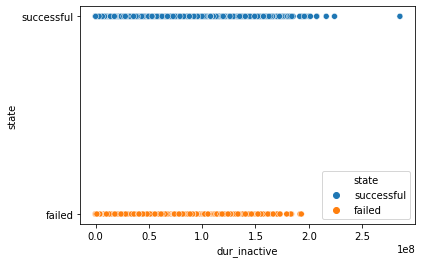

In [205]:
sns.scatterplot(x='dur_inactive', y='state',hue='state', data=frame_all)

In [135]:
frame_all.static_usd_rate.describe()

count    168698.000000
mean          1.014544
std           0.225134
min           0.008771
25%           1.000000
50%           1.000000
75%           1.000000
max           1.716408
Name: static_usd_rate, dtype: float64

<AxesSubplot:xlabel='static_usd_rate', ylabel='Count'>

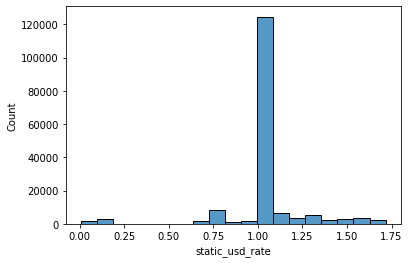

In [104]:
sns.histplot(frame_all['static_usd_rate'])

<AxesSubplot:xlabel='fx_rate', ylabel='Count'>

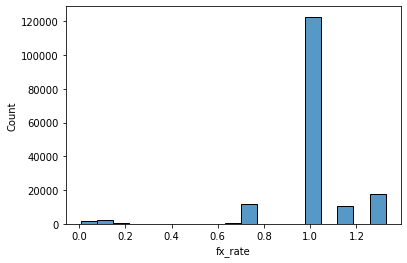

In [105]:
sns.histplot(frame_all['fx_rate'])

<AxesSubplot:xlabel='currency', ylabel='Count'>

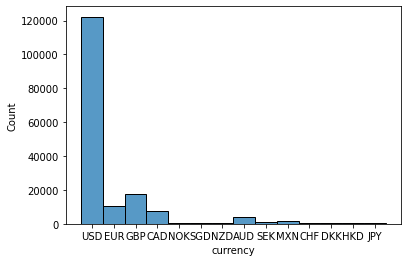

In [106]:
sns.histplot(frame_all['currency'])

In [147]:
frame_all.currency.value_counts()

USD    122267
GBP     17867
EUR     10638
CAD      7642
AUD      3833
MXN      1671
SEK      1073
NZD       738
DKK       711
HKD       656
CHF       511
SGD       469
NOK       396
JPY       226
Name: currency, dtype: int64

In [148]:
frame_all.current_currency.value_counts()

USD    168698
Name: current_currency, dtype: int64

In [136]:
frame_all.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,...,project_address,profile_photo,creator_name,creator_id,creator_thumb,creator_address,main_category,sub_category,state_bool,baseline
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,...,https://www.kickstarter.com/projects/149592564...,https://ksr-ugc.imgix.net/assets/011/625/534/5...,Daniel,1495925645,https://ksr-ugc.imgix.net/assets/006/041/047/c...,https://www.kickstarter.com/profile/1495925645,music,rock,1.0,1
1,97,An adorable fantasy enamel pin series of princ...,2259,US,2019-02-08 21:02:48,USD,$,True,USD,2019-03-05 16:00:11,...,https://www.kickstarter.com/projects/freckledd...,https://ksr-ugc.imgix.net/assets/024/033/030/d...,Katherine,1175589980,https://ksr-ugc.imgix.net/assets/023/302/489/4...,https://www.kickstarter.com/profile/freckleddi...,art,mixed media,1.0,1
2,88,Helping a community come together to set the s...,29638,US,2016-10-23 17:06:24,USD,$,True,USD,2016-12-01 15:58:50,...,https://www.kickstarter.com/projects/119685626...,https://ksr-ugc.imgix.net/assets/014/262/672/9...,MelissaThomas,1196856269,https://ksr-ugc.imgix.net/assets/014/275/164/5...,https://www.kickstarter.com/profile/1196856269,photography,photobooks,1.0,0
3,193,Every revolution starts from the bottom and we...,49158,IT,2018-10-24 08:32:00,EUR,€,False,USD,2018-12-08 22:59:00,...,https://www.kickstarter.com/projects/wearewao/...,https://ksr-ugc.imgix.net/assets/023/008/626/a...,WAO,1569700626,https://ksr-ugc.imgix.net/assets/023/008/808/d...,https://www.kickstarter.com/profile/wearewao,fashion,footwear,1.0,1
4,20,Learn to build 10+ Applications in this comple...,549,US,2015-03-07 05:35:17,USD,$,True,USD,2015-04-08 16:36:57,...,https://www.kickstarter.com/projects/187084538...,https://ksr-ugc.imgix.net/assets/012/061/410/1...,Kalpit Jain,1870845385,https://ksr-ugc.imgix.net/assets/008/757/546/9...,https://www.kickstarter.com/profile/1870845385,technology,software,0.0,0


In [138]:
df['conv-pledged'] = df['converted_pledged_amount'] - df['usd_pledged']

In [141]:
df['conv-pledged']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
3781     0.000000
3782     0.000000
3783    -0.289238
3784   -10.353630
3785     0.000000
Name: conv-pledged, Length: 3786, dtype: float64

<AxesSubplot:xlabel='state', ylabel='count'>

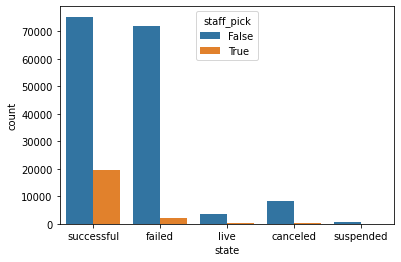

In [5]:
sns.countplot('state', data=frame_all, hue='staff_pick')

<AxesSubplot:xlabel='state', ylabel='count'>

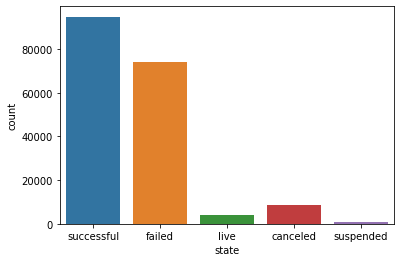

In [6]:
sns.countplot('state', data=frame_all)

<AxesSubplot:xlabel='state', ylabel='count'>

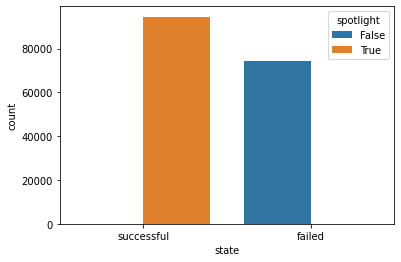

In [112]:
sns.countplot('state', data=frame_all, hue='spotlight')

In [144]:
df['pledg-usd_pledg'] = df['pledged'] - df['usd_pledged']

In [178]:
display(df[df['usd_type']=='international'].sort_values('pledg-usd_pledg', ascending=False))

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,conv-pledged,pledg-usd_pledg
2130,1754,"Black Rock Shooter Creator ""huke"" Produced ""LM...","{""id"":28,""name"":""Product Design"",""slug"":""desig...",473187,JP,1525669820,"{""id"":992618958,""name"":""TRIKT"",""is_registered""...",JPY,¥,False,...,True,True,successful,1530406865,0.009208,"{""web"":{""project"":""https://www.kickstarter.com...",482492.927754,international,-9305.927754,5.191922e+07
3722,221,"An international craft school in Kyoto, Japan,...","{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",33779,JP,1517993169,"{""id"":1911438091,""name"":""Takami Kawai 河井 尊臣""...",JPY,¥,False,...,True,True,successful,1521172251,0.009337,"{""web"":{""project"":""https://www.kickstarter.com...",33438.872934,international,340.127066,3.547994e+06
626,118,Hand crafted richness for a reasonable price.,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",11224,JP,1508235887,"{""id"":557662762,""name"":""proef"",""is_registered""...",JPY,¥,False,...,True,True,successful,1512373906,0.008771,"{""web"":{""project"":""https://www.kickstarter.com...",11103.731520,international,120.268480,1.254896e+06
2623,46,The goal of the game is to build the tallest b...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",2680,JP,1540445597,"{""id"":2039314666,""name"":""Mitsuo Yamamoto"",""is_...",JPY,¥,False,...,True,False,successful,1544490549,0.008851,"{""web"":{""project"":""https://www.kickstarter.com...",2667.921763,international,12.078237,2.987411e+05
1720,637,"Tracks your heart-rate, analyzes your sleep qu...","{""id"":341,""name"":""Wearables"",""slug"":""technolog...",43215,HK,1521177704,"{""id"":1237640011,""name"":""BozGo"",""is_registered...",HKD,$,True,...,True,False,successful,1525017513,0.127452,"{""web"":{""project"":""https://www.kickstarter.com...",43227.592452,international,-12.592452,2.959404e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,3892,Smart interdental cleaning! Thanks to its feel...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",116997,DE,1516370898,"{""id"":2106362391,""name"":""Louis, Marc & Burak"",...",EUR,€,False,...,True,False,successful,1524150035,1.227155,"{""web"":{""project"":""https://www.kickstarter.com...",115985.780090,international,1011.219910,-2.146978e+04
2413,1228,"Black Hallows Townsfolk, a range of 28mm or 32...","{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",101715,GB,1535453174,"{""id"":147900702,""name"":""Jon Stynes"",""is_regist...",GBP,£,False,...,True,False,successful,1538396701,1.303302,"{""web"":{""project"":""https://www.kickstarter.com...",101731.827041,international,-16.827041,-2.367483e+04
2841,1203,Pro Pinball: Timeshock! remade from scratch an...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",78349,GB,1362497177,"{""id"":500643708,""name"":""Barnstorm Games"",""is_r...",GBP,£,False,...,True,False,successful,1379188835,1.533599,"{""web"":{""project"":""https://www.kickstarter.com...",75682.351784,international,2666.648216,-2.633284e+04
2534,1226,"Finally, a toy you can have a real conversatio...","{""id"":52,""name"":""Hardware"",""slug"":""technology/...",106403,GB,1372675554,"{""id"":2117525416,""name"":""Supertoy Robotics"",""i...",GBP,£,False,...,True,False,successful,1377213479,1.528141,"{""web"":{""project"":""https://www.kickstarter.com...",104098.473306,international,2304.526694,-3.597747e+04


<AxesSubplot:xlabel='converted_pledged_amount', ylabel='usd_pledged'>

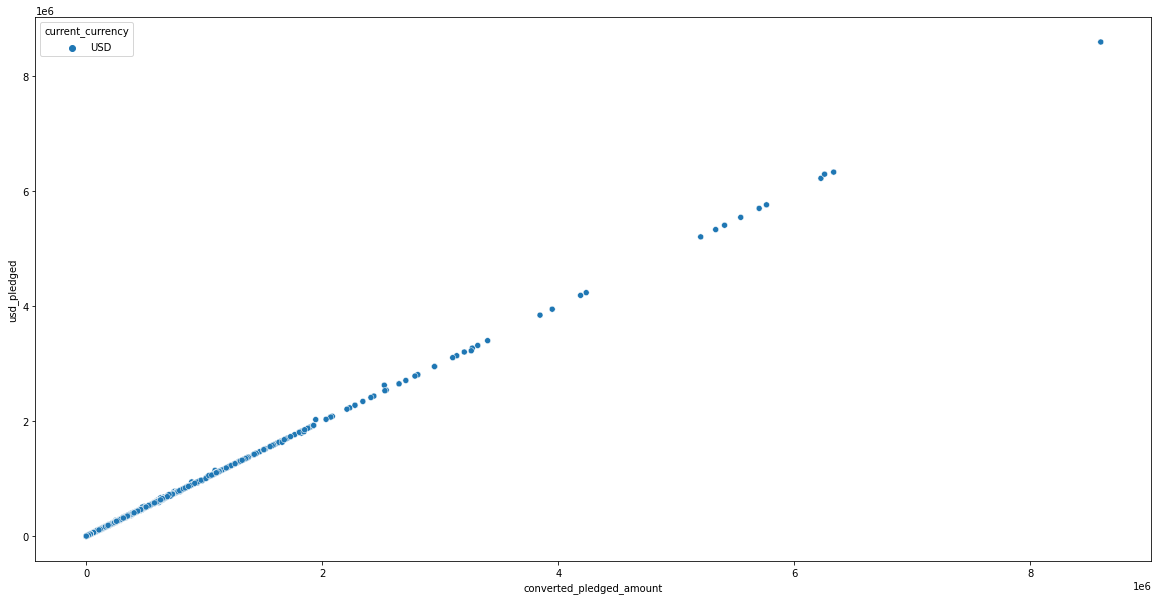

In [113]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('converted_pledged_amount', 'usd_pledged', hue='current_currency', data=frame_all)

# RESULT: 'converted_pledged_amount' and 'usd_pledged'seem to deliver in most cases the same numbers.

<AxesSubplot:xlabel='pledged', ylabel='usd_pledged'>

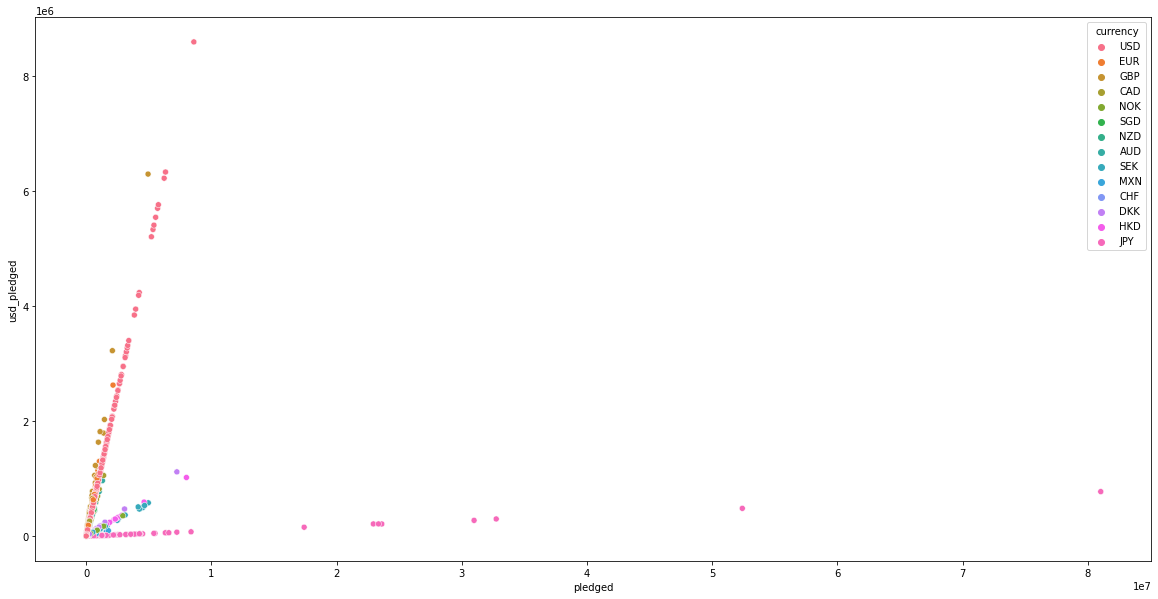

In [114]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('pledged', 'usd_pledged', hue='currency', data=frame_all)

# RESULT: 'pledged' and 'usd_pledged'do not deliver the same absolute numbers, since sometimes different currencies are shown.
# See for example the observation on the bottom right, which seems to be a campaign in JPN YEN, which is much smaller in USD.
# NOT use 'pledged' in model
# Use 'pledged' only for comparing with 'goal'variable in order to calculate surpass or not surpassed goals.

In [115]:
frame_all.iloc[frame_all['pledged'].idxmax()] 

Unnamed: 0                                                               1719
backers_count                                                           12613
blurb                       The Good Life is a new video game co-developed...
converted_pledged_amount                                               743538
country                                                                    JP
created_at                                                2017-12-18 02:31:05
currency                                                                  JPY
currency_symbol                                                             ¥
currency_trailing_code                                                  False
current_currency                                                          USD
deadline                                                  2018-05-05 00:00:00
disable_communication                                                   False
fx_rate                                                         

<AxesSubplot:xlabel='goal', ylabel='usd_pledged'>

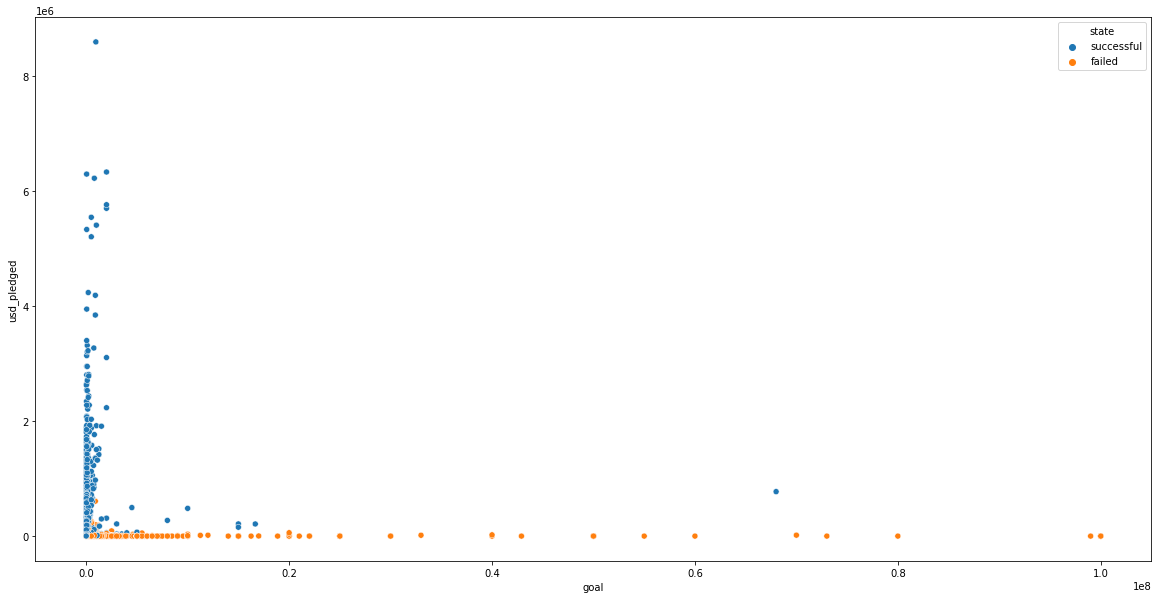

In [117]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot('goal', 'usd_pledged', hue='state', data=frame_all)

In [118]:
frame_all.groupby('state').mean()

,Unnamed: 0,backers_count,converted_pledged_amount,currency_trailing_code,disable_communication,fx_rate,goal,id,is_starrable,pledged,spotlight,staff_pick,static_usd_rate,usd_pledged,creator_id,state_bool,baseline
state,,,,,,,,,,,,,,,,,
failed,104062.635568,12.311659,1093.026359,0.811140,0.0,0.991108,93559.720535,1.072412e+09,0.0,1619.362907,0.0,0.030352,1.010286,1094.499354,1.075015e+09,0.0,0.598942
successful,96239.511214,240.337140,20743.456587,0.838827,0.0,1.000928,12960.477943,1.073433e+09,0.0,28306.564273,1.0,0.204560,1.017882,20760.766856,1.074254e+09,1.0,0.829574


In [149]:
# Calculate amount of surpass or not surpass (pledged - goal)
frame_all['goal_surpass'] = frame_all['pledged'] - frame_all['goal']
# Calculate share of surpassing or not surpassing
frame_all['goal_surpass_share'] = frame_all['goal_surpass'] / frame_all['goal']
# Convert goal_surpass into USD
frame_all['goal_surpass_usd'] = frame_all['goal_surpass'] * frame_all['static_usd_rate']
# Convert goal into USD
frame_all['goal_usd'] = frame_all['goal'] * frame_all['static_usd_rate']

# JUST FOR DOUBLE CHECKING THE RESULTS:
# Calculate amount of surpass or not surpass in USD for check (usd_pledged - goal_usd)
frame_all['goal_surpass_usd_check'] = frame_all['usd_pledged'] - frame_all['goal_usd']
# Calculate share of surpassing or not surpassing of the USD check
frame_all['goal_surpass_share_usd'] = frame_all['goal_surpass_usd_check'] / frame_all['goal_usd']


In [150]:
frame_all['error_share']= frame_all['goal_surpass_share_usd'] - frame_all['goal_surpass_share']
frame_all['error_share'].sum()

2.4387541347862918e-08

In [121]:
print(frame_all.goal_surpass_share.describe())
print(frame_all.goal_surpass_share_usd.describe())

count    168698.000000
mean          3.710631
std         253.799076
min          -1.000000
25%          -0.980000
50%           0.012882
75%           0.225250
max       68763.100000
Name: goal_surpass_share, dtype: float64
count    168698.000000
mean          3.710631
std         253.799076
min          -1.000000
25%          -0.980000
50%           0.012882
75%           0.225250
max       68763.100000
Name: goal_surpass_share_usd, dtype: float64


#### RESULT: 'goal_surpass_share' and 'goal_surpass_usd' can be used since the "check-columns" provide the same results.
#### TAKE CARE: There are huge outliers in the share --> Max 68763 (project id: 1947298033)

In [176]:
i = frame_all.goal_surpass_share.argmax()
print(frame_all.iloc[i])

backers_count                                                             955
blurb                       The 3rd installment of the popular Covers with...
converted_pledged_amount                                                68764
country                                                                    US
created_at                                                2016-10-11 23:14:53
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                  2016-12-13 18:04:27
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                            

In [151]:
goal_1 = frame_all.loc[frame_all['goal'] == 1]

# RESULT: There are 246+17 rows where the goal only was 1 (Currency). Valid observations?

In [124]:
goal_1.state.value_counts()

successful    246
failed         17
Name: state, dtype: int64

In [174]:
failed = frame_all.loc[frame_all['state'] == 'failed']
success = frame_all.loc[frame_all['state'] == 'successful']



In [175]:
success.max()

# RESULT: Within the successful projects, max goal is 200.000 USD 

backers_count                                                          105857
blurb                       🚨 Limited-Time Offers 🚨 Early Access 🚨 World-C...
converted_pledged_amount                                              8596474
country                                                                    US
created_at                                                2019-03-04 04:34:18
currency                                                                  USD
currency_symbol                                                             €
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                  2019-03-14 04:06:01
disable_communication                                                   False
fx_rate                                                               1.32568
goal                                                            

In [177]:
failed_0 = failed.loc[failed['goal_surpass'] > 0]

# RESULT: 3 observations surpassed the goal but nevertheless failed --> Shall be removed??


In [178]:
failed_0.id

40082     1085047405
60727     1880688778
149883    1090065437
Name: id, dtype: int64

<AxesSubplot:xlabel='goal_usd', ylabel='goal_surpass_usd'>

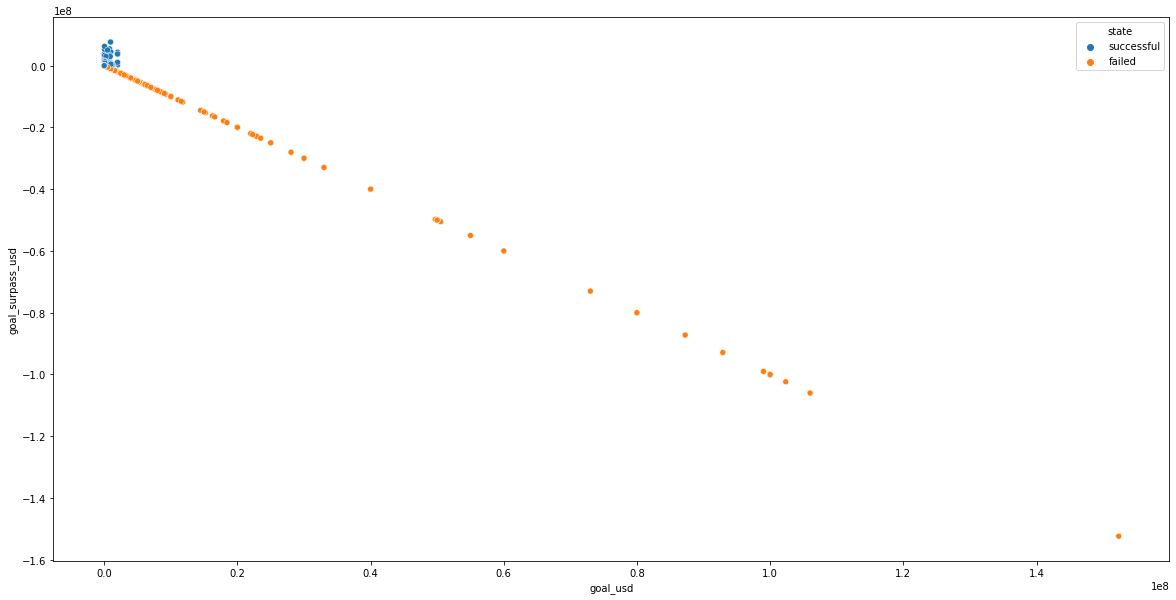

In [168]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x='goal_usd', y='goal_surpass_usd', data=frame_all, hue='state')
# RESULT: The higher the goal the more projects have failed.

<AxesSubplot:xlabel='goal_usd', ylabel='state'>

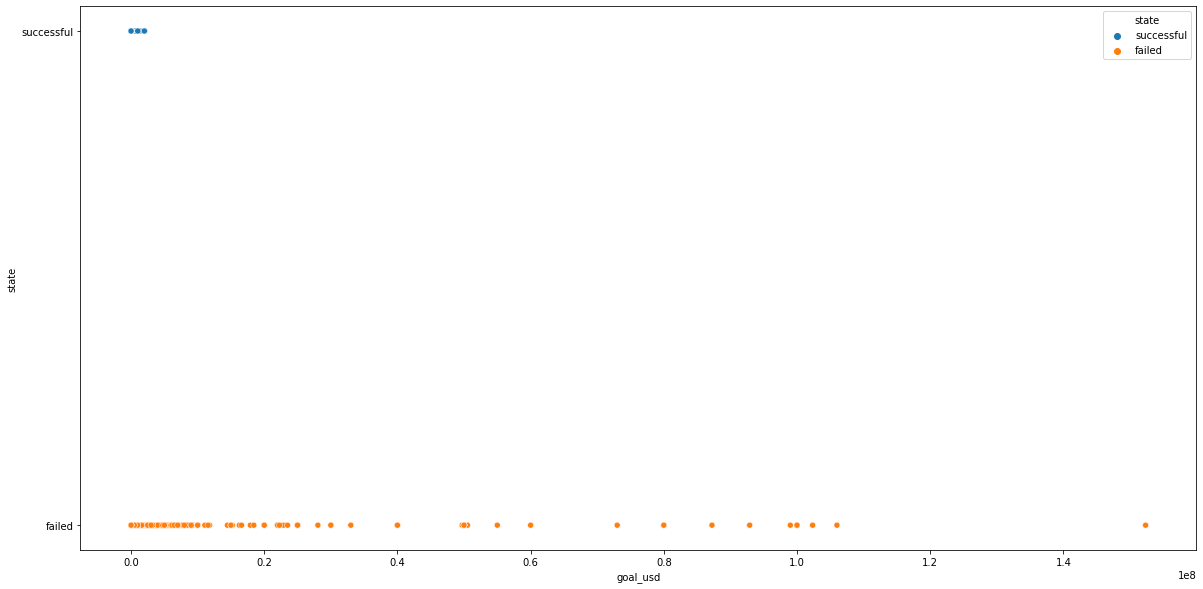

In [170]:
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x='goal_usd', y='state', data=frame_all, hue='state')
# RESULT: The higher the goal the more projects have failed.

In [165]:
i=frame_all.goal_usd.argmax()
print(frame_all.iloc[i])

backers_count                                                               0
blurb                       A 2000 year old "Romeo & Juliet" love story, s...
converted_pledged_amount                                                    0
country                                                                    GB
created_at                                                2015-10-29 22:01:46
currency                                                                  GBP
currency_symbol                                                             £
currency_trailing_code                                                  False
current_currency                                                          USD
deadline                                                  2015-11-30 22:01:00
disable_communication                                                   False
fx_rate                                                               1.32568
goal                                                            

In [186]:
# Calculate number of words in blurb
frame_all['blurb_words'] = frame_all['blurb'].str.split().str.len()
# Calculate number of characters in blurb
frame_all['blurb_len'] = frame_all['blurb'].str.len()
# Calculate number of characters in name
frame_all['name_len'] = frame_all['name'].str.len()
# Calculate number of words in name
frame_all['name_words'] = frame_all['name'].str.split().str.len()